In [6]:
def read_student_data(file_path):
    """Read data from csv file and return"""
    students_list = []
    with open(file_path, mode='r') as file:
        headers = file.readline().strip().split(",")
        for line in file:
            student = {}
            values = line.strip().split(",")
            for i, header in enumerate(headers):
                student[header.strip()] = values[i].strip()
                if header.strip() == "CGPA":
                    student[header.strip()] = float(student[header.strip()])

            students_list.append(student)

    return students_list


def pick_student(all_students, tut_grp):
    """pick student out from the tutorial group"""
    students_list = []

    for student in all_students:
        if student['Tutorial Group'] == f'G-{tut_grp}':
            students_list.append(student)

    return students_list


def diverse_team(sorted_student_more, sorted_student_less):  # index(0,-1,or middle)
    team = []
    i = 0  # round
    sorted_student = [sorted_student_more, sorted_student_less]

    gender_index = 0

    while len(team) < 5 and (sorted_student[0] or sorted_student[1]):  # add student into team when teams is not full
        index_changes = [+1, -1, +1]
        pick_index = [0, -1, len(sorted_student[gender_index]) // 2]
        while True:
            if not sorted_student[gender_index]:
                break
            elif index_changes[i] >= 0 and pick_index[i] + index_changes[i] < len(sorted_student[gender_index]) and index_changes[
                i] <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] += 1
            elif index_changes[i] < 0 and abs(pick_index[i] + index_changes[i]) <= len(sorted_student[gender_index]) and abs(
                    index_changes[i]) <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] -= 1
            else:
                # If the index exceeds the list length, reset index_changes or break
                team.append(sorted_student[gender_index].pop(pick_index[i]))
                break

        i += 1
        gender_index += 1
        if i > 2:
            i = 0
        if gender_index > 1:
            gender_index = 0

    return team


def division_into_team(students_list):
    """Divides student from student_list into group of 5 with balance of cgpa and gender, and diverse of school"""
    # Separate male and female students into two lists
    male_students = [student for student in students_list if student['Gender'] == 'Male']
    female_students = [student for student in students_list if student['Gender'] == 'Female']

    # Sort the male and female students by CGPA
    male_sorted_students = sorted(male_students, key=lambda student: student['CGPA'])
    female_sorted_students = sorted(female_students, key=lambda student: student['CGPA'])

    teams = [[] for _ in range(len(students_list) // 5)]
    team_index = 0

    while team_index < len(teams):  # while haven't added student into all teams
        if len(male_sorted_students) >= len(female_sorted_students):  # if remain male student more than remain female student
            teams[team_index] = diverse_team(male_sorted_students, female_sorted_students)

        else:  # if remain male student less than remain female student
            teams[team_index] = diverse_team(female_sorted_students, male_sorted_students)

        team_index += 1

    return teams


def see_group_division(group_div):
    for i, x in enumerate(group_div):
        print(f"Group {i}")
        cgpa = 0
        for j in x:
            print(j["Student ID"], j["School"], j["CGPA"], j["Gender"])
            cgpa += j["CGPA"]
        print(f" the mean cgpa of this group is {cgpa / len(x)}")
        print()


students = read_student_data('records.csv')
group_division = []
tutorial_grp = 1

while tutorial_grp <= 150:
    group_division.extend(division_into_team(pick_student(students, tutorial_grp)))
    tutorial_grp += 1

see_group_division(group_division)

with open("group-base.txt", mode="w") as f:
    for i, x in enumerate(group_division):
        f.write(f"Group {i}\n")
        cgpa = 0
        for j in x:
            l = f"{j['Student ID'], j['School'], j['CGPA'], j['Gender']}\n"
            f.write(l)
            cgpa += j["CGPA"]
        f.write(f" the mean cgpa of this group is {cgpa / len(x)}\n")
        f.write("\n")


Group 0
2353 SBS 3.95 Female
2091 EEE 4.2 Male
592 MSE 4.11 Female
1645 CoE 3.93 Male
2069 SSS 4.48 Female
 the mean cgpa of this group is 4.134

Group 1
2326 CoB (NBS) 3.95 Female
3989 WKW SCI 4.15 Male
4479 CCDS 4.11 Female
3148 EEE 3.88 Male
4338 SPMS 4.22 Female
 the mean cgpa of this group is 4.061999999999999

Group 2
4563 WKW SCI 4.01 Female
2776 CCEB 4.14 Male
5703 SPMS 4.12 Female
4657 SoH 4.0 Male
809 CoB (NBS) 4.26 Female
 the mean cgpa of this group is 4.106

Group 3
2151 EEE 4.02 Female
1841 MAE 4.12 Male
1271 SSS 4.17 Female
288 CoB (NBS) 4.01 Male
4820 CoE 4.22 Female
 the mean cgpa of this group is 4.108

Group 4
2115 EEE 4.03 Female
1417 CoE 4.12 Male
945 MAE 4.1 Female
5002 CCDS 4.02 Male
659 SSS 4.2 Female
 the mean cgpa of this group is 4.093999999999999

Group 5
567 CoB (NBS) 4.03 Female
4520 EEE 4.11 Male
2650 SoH 4.09 Female
588 MAE 4.06 Male
4402 CCDS 4.08 Female
 the mean cgpa of this group is 4.074

Group 6
75 CCDS 4.03 Female
5477 SoH 4.09 Male
3930 EEE 4.18 

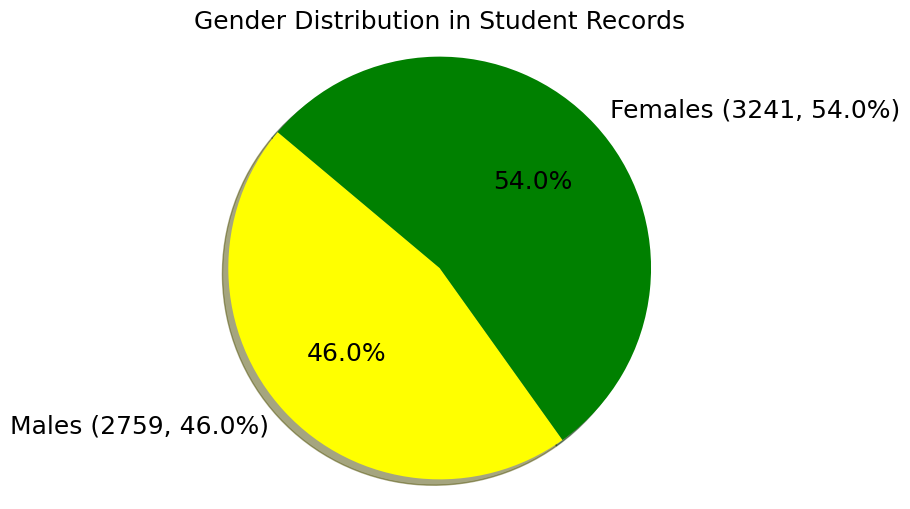

In [7]:
import matplotlib.pyplot as plt

def visualize_gender_distribution(students):
    """Visualize the gender distribution in the student records using a pie chart with counts and percentages."""
    male_count = sum(1 for student in students if student['Gender'] == 'Male')
    female_count = sum(1 for student in students if student['Gender'] == 'Female')

    # Data for pie chart
    sizes = [male_count, female_count]
    colors = ['yellow', 'green']

    # Create labels with counts and percentages
    labels = [f'Males ({male_count}, {100 * male_count / sum(sizes):.1f}%)', 
              f'Females ({female_count}, {100 * female_count / sum(sizes):.1f}%)']

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 18})

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Gender Distribution in Student Records',fontsize=18)
    plt.show()

# Load students data from records.csv
students = read_student_data('records.csv')

# Visualize gender distribution
visualize_gender_distribution(students)

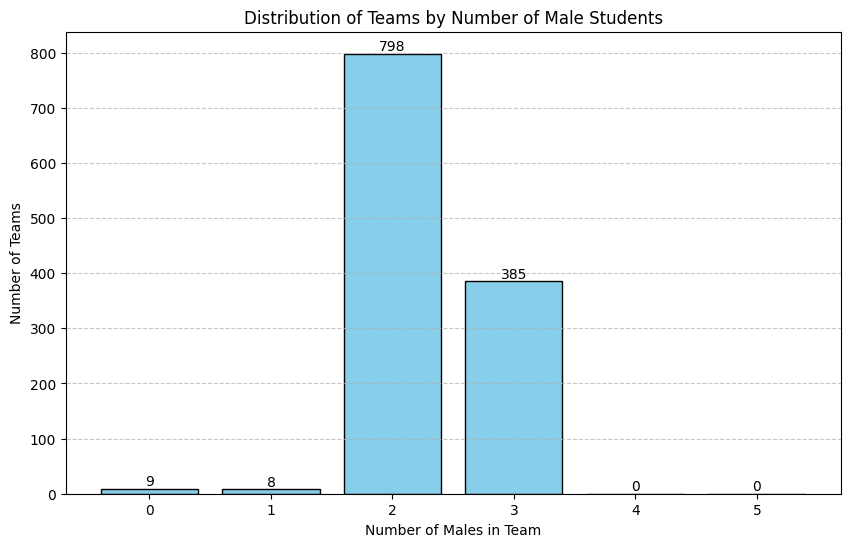

In [9]:
def count_males_in_teams(group_division):
    """Count the number of males in each team and categorize them."""
    male_counts = [0] * 6  # Initialize a list to count males in the categories 0-5

    for team in group_division:
        male_count = sum(1 for student in team if student['Gender'] == 'Male')
        # Increment the appropriate category
        if male_count <= 5:
            male_counts[male_count] += 1

    return male_counts


def visualize_male_team_distribution(male_counts):
    # Categories for the x-axis (0 to 5 males)
    categories = range(6)  # 0, 1, 2, 3, 4, 5
    team_counts = male_counts

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, team_counts, color='skyblue', edgecolor='black')

    # Adding labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
                 ha='center', va='bottom', fontsize=10)  # Centered above the bar

    # Customizing the plot
    plt.xticks(categories)  # Set x-ticks to be 0 to 5
    plt.xlabel("Number of Males in Team")
    plt.ylabel("Number of Teams")
    plt.title("Distribution of Teams by Number of Male Students")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

# Run the analysis and visualization
male_counts = count_males_in_teams(group_division)
visualize_male_team_distribution(male_counts)

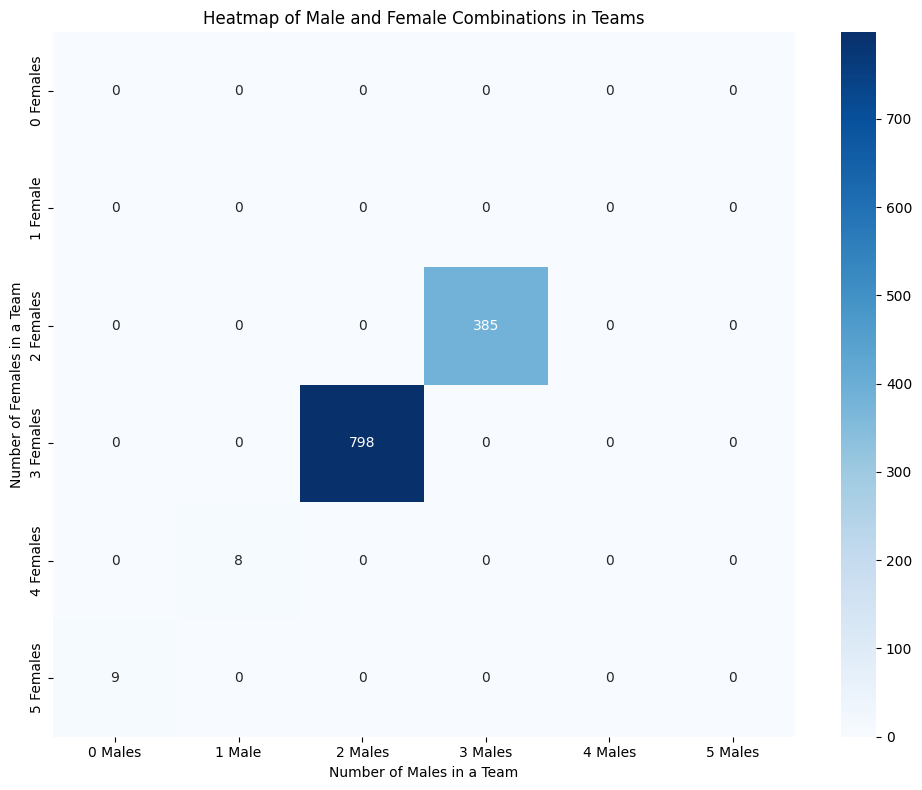

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_gender_heatmap_data(teams):
    """Create data for heatmap: count of male and female combinations in teams."""
    heatmap_data = [[0] * 6 for _ in range(6)]  # 6 categories for 0 to 5 males and females

    for team in teams:
        male_count = sum(1 for student in team if student['Gender'] == 'Male')
        female_count = sum(1 for student in team if student['Gender'] == 'Female')
        
        if male_count <= 5 and female_count <= 5:
            heatmap_data[female_count][male_count] += 1  # Row: Female count, Column: Male count

    return heatmap_data

def visualize_gender_heatmap(heatmap_data):
    """Visualize the number of males and females in teams as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar=True,
                xticklabels=['0 Males', '1 Male', '2 Males', '3 Males', '4 Males', '5 Males'],
                yticklabels=['0 Females', '1 Female', '2 Females', '3 Females', '4 Females', '5 Females'])
    
    plt.title('Heatmap of Male and Female Combinations in Teams')
    plt.xlabel('Number of Males in a Team')
    plt.ylabel('Number of Females in a Team')
    plt.tight_layout()
    plt.show()

# Assuming you have already formed your teams
heatmap_data = create_gender_heatmap_data(group_division)  # group_division should be defined
visualize_gender_heatmap(heatmap_data)

In [ ]:
#Below is just experimenting, found it very ugly to visualize due to the large number of tutorial groups. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_gender_equality(group_division):
    # Prepare data
    team_names = [f"Team {i+1}" for i in range(len(group_division))]
    male_counts = []
    female_counts = []

    # Count males and females in each team
    for team in group_division:
        males = sum(1 for student in team if student['Gender'] == 'Male')
        females = sum(1 for student in team if student['Gender'] == 'Female')
        male_counts.append(males)
        female_counts.append(females)

    # Plotting
    x = range(len(group_division))
    fig, ax = plt.subplots(figsize=(12, 6))

    # Bar width and positions
    bar_width = 0.35
    ax.bar(x, male_counts, width=bar_width, label='Male', color='skyblue')
    ax.bar([pos + bar_width for pos in x], female_counts, width=bar_width, label='Female', color='salmon')

    # Customizing plot
    ax.set_xlabel("Teams")
    ax.set_ylabel("Number of Students")
    ax.set_title("Gender Distribution Across Teams")
    ax.set_xticks([pos + bar_width / 2 for pos in x])
    ax.set_xticklabels(team_names, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Run visualization with your data
visualize_gender_equality(group_division)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def count_gender_in_tutorial_groups(students):
    # Initialize a dictionary to hold counts of males and females by tutorial group
    gender_counts = {}

    for student in students:
        tut_group = student['Tutorial Group']
        if tut_group not in gender_counts:
            gender_counts[tut_group] = {'Male': 0, 'Female': 0}
        
        if student['Gender'] == 'Male':
            gender_counts[tut_group]['Male'] += 1
        elif student['Gender'] == 'Female':
            gender_counts[tut_group]['Female'] += 1

    return gender_counts

def visualize_gender_distribution_by_tutorial_group(gender_counts):
    tutorial_groups = list(gender_counts.keys())
    males = [gender_counts[group]['Male'] for group in tutorial_groups]
    females = [gender_counts[group]['Female'] for group in tutorial_groups]

    # Set up bar positions
    x = np.arange(len(tutorial_groups))  # the label locations
    width = 0.35  # the width of the bars

    # Create the bar chart
    plt.figure(figsize=(12, 6))
    bars1 = plt.bar(x - width/2, males, width, label='Males', color='skyblue')
    bars2 = plt.bar(x + width/2, females, width, label='Females', color='salmon')

    # Adding labels on top of the bars
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
                 ha='center', va='bottom', fontsize=10)

    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
                 ha='center', va='bottom', fontsize=10)

    # Customizing the plot
    plt.xlabel('Tutorial Groups')
    plt.ylabel('Number of Students')
    plt.title('Gender Distribution Across Tutorial Groups')
    plt.xticks(x, tutorial_groups)  # Set x-ticks to be the tutorial group names
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Run the analysis and visualization
gender_counts = count_gender_in_tutorial_groups(students)
visualize_gender_distribution_by_tutorial_group(gender_counts)

In [ ]:
def visualize_gender_distribution_horizontal(gender_counts):
    tutorial_groups = list(gender_counts.keys())
    males = [gender_counts[group]['Male'] for group in tutorial_groups]
    females = [gender_counts[group]['Female'] for group in tutorial_groups]

    # Create the horizontal bar chart
    plt.figure(figsize=(10, 20))
    
    # Create bars for males
    bars1 = plt.barh(tutorial_groups, males, label='Males', color='skyblue')
    # Create bars for females
    bars2 = plt.barh(tutorial_groups, females, label='Females', color='salmon', left=males)

    # Adding labels on the bars
    for bar in bars1:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()),
                 ha='left', va='center', fontsize=10)

    for bar in bars2:
        plt.text(bar.get_width() + bar.get_x(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()),
                 ha='left', va='center', fontsize=10)

    # Customizing the plot
    plt.xlabel('Number of Students')
    plt.ylabel('Tutorial Groups')
    plt.title('Gender Distribution Across Tutorial Groups')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Run the analysis and visualization
gender_counts = count_gender_in_tutorial_groups(students)
visualize_gender_distribution_horizontal(gender_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_heatmap_data(teams, num_tutorial_groups):
    """Create data for heatmap: number of males in teams across tutorial groups."""
    heatmap_data = [[0] * 6 for _ in range(num_tutorial_groups)]  # 6 categories for 0 to 5 males

    for i in range(num_tutorial_groups):
        # Pick teams for the current tutorial group (assuming teams are organized accordingly)
        tutorial_group_teams = [team for team in teams if team[0]['Tutorial Group'] == f'G-{i + 1}']
        
        for team in tutorial_group_teams:
            male_count = sum(1 for student in team if student['Gender'] == 'Male')
            if male_count <= 5:
                heatmap_data[i][male_count] += 1

    return heatmap_data

def visualize_heatmap(heatmap_data):
    """Visualize the number of males in teams across tutorial groups as a heatmap."""
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar=True,
                xticklabels=['0 Males', '1 Male', '2 Males', '3 Males', '4 Males', '5 Males'],
                yticklabels=[f'Group {i + 1}' for i in range(len(heatmap_data))])
    
    plt.title('Heatmap of Male Representation in Teams Across Tutorial Groups')
    plt.xlabel('Number of Males in a Team')
    plt.ylabel('Tutorial Groups')
    plt.tight_layout()
    plt.show()

# Assuming you have already formed your teams
num_tutorial_groups = 120  # Update this based on your total number of groups
heatmap_data = create_heatmap_data(group_division, num_tutorial_groups)  # group_division should be defined
visualize_heatmap(heatmap_data)